In [29]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Extinction Demo

## Shao + (2007) Model

This is a luminosity and shape independent model for dust extincton in disk galaxies.  

In [30]:
# dust extinction
from extinction_model_components import PS08DustExtinction, Shao07DustExtinction
extinction_model = Shao07DustExtinction()

In [49]:
theta = np.linspace(0,np.pi/2,100)
e = central_extinction_model.extinction_model(theta)

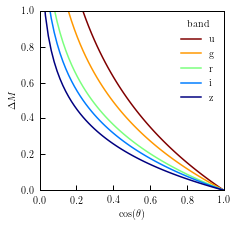

In [54]:
colors = plt.cm.jet_r(np.linspace(0,1,5))

plt.figure(figsize=(3.3,3.3))
l1, = plt.plot(np.cos(theta), e[:,0], color=colors[0])
l2, = plt.plot(np.cos(theta), e[:,1], color=colors[1])
l3, = plt.plot(np.cos(theta), e[:,2], color=colors[2])
l4, = plt.plot(np.cos(theta), e[:,3], color=colors[3])
l5, = plt.plot(np.cos(theta), e[:,4], color=colors[4])
plt.ylim([0,1])
plt.xlim([0,1])
plt.xlabel(r'$\cos(\theta)$')
plt.ylabel(r'$\Delta M$')
plt.legend([l1, l2 , l3, l4, l5],['u','g','r','i','z'], title='band',
           loc='upper right', frameon=False, fontsize=10)
plt.show()

## PS08 Model

This is a luminosity and shape dependent model for dust extincton in disk galaxies.  

In [40]:
# dust extinction
from extinction_model_components import PS08DustExtinction, Shao07DustExtinction
extinction_model_1 = PS08DustExtinction(sample='luminosity_sample_1')
extinction_model_2 = PS08DustExtinction(sample='luminosity_sample_2')
extinction_model_3 = PS08DustExtinction(sample='luminosity_sample_3')
extinction_model_4 = PS08DustExtinction(sample='luminosity_sample_4')

In [41]:
n_sample = 100
theta = np.linspace(0,np.pi/2,n_sample)

ys = np.linspace(0,0.9,10)
e_1 = np.zeros((len(ys),n_sample))
e_2 = np.zeros((len(ys),n_sample))
e_3 = np.zeros((len(ys),n_sample))
e_4 = np.zeros((len(ys),n_sample))

for i, y in enumerate(ys):
    y = np.array([y]*100)
    e_1[i,:] = extinction_model_1.extinction_model(theta, y)
    e_2[i,:] = extinction_model_2.extinction_model(theta, y)
    e_3[i,:] = extinction_model_3.extinction_model(theta, y)
    e_4[i,:] = extinction_model_4.extinction_model(theta, y)

Below, I compare the dependence of extinction on the inclination angle for different valiues of the axis ratio, y=c/b.  On each plot, I show the r-band relation in the Shao + (2007) model from above as a black dsashed line.

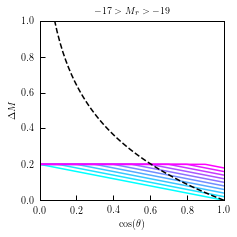

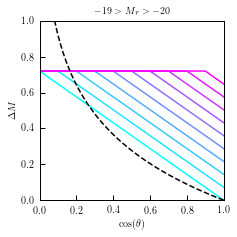

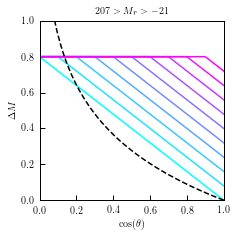

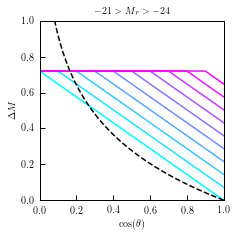

In [53]:
colors = plt.cm.cool(np.linspace(0,1,10))

plt.figure(figsize=(3.3,3.3))
for i in range(0,10):
    plt.plot(np.cos(theta), e_1[i,:], color=colors[i])
plt.plot(np.cos(theta), e[:,2], '--', color='black')
plt.ylim([0,1])
plt.xlim([0,1])
plt.xlabel(r'$\cos(\theta)$')
plt.ylabel(r'$\Delta M$')
plt.title(r'$-17 > M_r > -19$')
plt.show()

plt.figure(figsize=(3.3,3.3))
for i in range(0,10):
    plt.plot(np.cos(theta), e_2[i,:], color=colors[i])
plt.plot(np.cos(theta), e[:,2], '--', color='black')
plt.ylim([0,1])
plt.xlim([0,1])
plt.xlabel(r'$\cos(\theta)$')
plt.ylabel(r'$\Delta M$')
plt.title(r'$-19 > M_r > -20$')
plt.show()

plt.figure(figsize=(3.3,3.3))
for i in range(0,10):
    plt.plot(np.cos(theta), e_3[i,:], color=colors[i])
plt.plot(np.cos(theta), e[:,2], '--', color='black')
plt.ylim([0,1])
plt.xlim([0,1])
plt.xlabel(r'$\cos(\theta)$')
plt.ylabel(r'$\Delta M$')
plt.title(r'$207 > M_r > -21$')
plt.show()

plt.figure(figsize=(3.3,3.3))
for i in range(0,10):
    plt.plot(np.cos(theta), e_4[i,:], color=colors[i])
plt.plot(np.cos(theta), e[:,2], '--', color='black')
plt.ylim([0,1])
plt.xlim([0,1])
plt.xlabel(r'$\cos(\theta)$')
plt.ylabel(r'$\Delta M$')
plt.title(r'$-21 > M_r > -24$')
plt.show()

## Luminosity function

Below, I popuilate a simulation.  I look at the effect of extinction on the observed luminosity function of galaxies.

In [1]:
from halotools.sim_manager import CachedHaloCatalog
halocat = CachedHaloCatalog(simname='bolshoi', halo_finder='rockstar', redshift=0, version_name='halotools_v0p4')

In [2]:
from halotools.empirical_models import HodModelFactory

# define the central occupatoion model
from halotools.empirical_models import TrivialPhaseSpace, Cacciato09Cens
cens_occ_model =  Cacciato09Cens(prim_haloprop_key = 'halo_mvir', threshold = 9.0)
cens_prof_model = TrivialPhaseSpace()

# define the satellite occupation model
from halotools.empirical_models import Cacciato09Sats
from halotools.empirical_models import NFWPhaseSpace, SubhaloPhaseSpace
sats_occ_model =  Cacciato09Sats(prim_haloprop_key = 'halo_mvir', threshold = 9.0)
sats_occ_model._suppress_repeated_param_warning = True
sats_prof_model = NFWPhaseSpace()

# define quenching model
from halotools.empirical_models import ZuMandelbaum16QuenchingCens, ZuMandelbaum16QuenchingSats
cens_quenching_model = ZuMandelbaum16QuenchingCens(prim_haloprop_key = 'halo_mvir')
sats_quenching_model = ZuMandelbaum16QuenchingSats(prim_haloprop_key = 'halo_mvir')

# define morphology model
from morphology_model_components import Morphology
cens_morpholopgy_model = Morphology(gal_type='centrals')
sats_morpholopgy_model = Morphology(gal_type='satellites')

# define shape model
from shape_model_components import PS08Shapes, EllipticalGalaxyShapes, DiskGalaxyShapes
cens_elliptical_shape_model = EllipticalGalaxyShapes(gal_type='centrals')
cens_disk_shape_model       = DiskGalaxyShapes(gal_type='centrals')
sats_elliptical_shape_model = EllipticalGalaxyShapes(gal_type='satellites')
sats_disk_shape_model       = DiskGalaxyShapes(gal_type='satellites')

# define alignment model
from intrinsic_alignments.ia_models.ia_model_components import RandomAlignment
central_orientation_model = RandomAlignment(gal_type='centrals')
satellite_orientation_model = RandomAlignment(gal_type='satellites')

# projected shapes
from shape_model_components import ProjectedShapes
central_proj_shapes_model = ProjectedShapes('centrals')
satellite_proj_shapes_model = ProjectedShapes('satellites')

# extinction model
from extinction_model_components import Shao07DustExtinction
central_extinction_model = Shao07DustExtinction(gal_type='centrals')
satellite_extinction_model = Shao07DustExtinction(gal_type='satellites')

# combine model components
model_instance = HodModelFactory(centrals_occupation = cens_occ_model,
                                 centrals_profile = cens_prof_model,
                                 satellites_occupation = sats_occ_model,
                                 satellites_profile = sats_prof_model,
                                 centrals_quenching = cens_quenching_model,
                                 satellites_quenching = sats_quenching_model,
                                 centrals_morphology = cens_morpholopgy_model,
                                 satellites_morphology = sats_morpholopgy_model,
                                 centrals_elliptical_galaxy_shape = cens_elliptical_shape_model,
                                 centrals_disk_galaxy_shape = cens_disk_shape_model,
                                 satellites_elliptical_galaxy_shape = sats_elliptical_shape_model,
                                 satellites_disk_galaxy_shape = sats_disk_shape_model,
                                 centrals_orientation = central_orientation_model,
                                 satellites_orientation = satellite_orientation_model,
                                 centrals_proj_shapes = central_proj_shapes_model,
                                 satellites_proj_shapes = satellite_proj_shapes_model,
                                 centrals_extinction_model = central_extinction_model,
                                 satellites_extinction_model = satellite_extinction_model,
                                 model_feature_calling_sequence = (
                                 'centrals_occupation',
                                 'centrals_profile',
                                 'satellites_occupation',
                                 'satellites_profile',
                                 'centrals_quenching',
                                 'satellites_quenching',
                                 'centrals_morphology',
                                 'satellites_morphology',
                                 'centrals_elliptical_galaxy_shape',
                                 'centrals_disk_galaxy_shape',
                                 'satellites_elliptical_galaxy_shape',
                                 'satellites_disk_galaxy_shape',
                                 'centrals_orientation',
                                 'satellites_orientation',
                                 'centrals_proj_shapes',
                                 'satellites_proj_shapes',
                                 'centrals_extinction_model',
                                 'satellites_extinction_model')
                                )

In [3]:
# populate mock catalog
model_instance.populate_mock(halocat)
mock = model_instance.mock.galaxy_table

N_gal = len(mock)
print("number of galaxies: ", N_gal)

f_sat = 1.0*np.sum(mock['gal_type']=='satellites')/N_gal
print("satellite fraction: ", f_sat)

f_quiescent = 1.0*np.sum(mock['quiescent']==True)/N_gal
print("quiescent fraction: ", f_quiescent)

/Users/duncan/Code/halotools/halotools/empirical_models/phase_space_models/analytic_models/monte_carlo_helpers.py:205: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.rad_prof_func_table_indices[digitized_param_list]
/Users/duncan/Code/halotools/halotools/empirical_models/phase_space_models/analytic_models/monte_carlo_helpers.py:522: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.rad_prof_func_table_indices[digitized_param_list]


('number of galaxies: ', 542847)
('satellite fraction: ', 0.27185376358347746)
('quiescent fraction: ', 0.5218818562136293)


In [10]:
from astro_utils.magnitudes import luminosity_to_absolute_magnitude
mag_r = luminosity_to_absolute_magnitude(mock['luminosity'], band='r')
obs_mag_r = mag_r + mock['deltaMag_r']

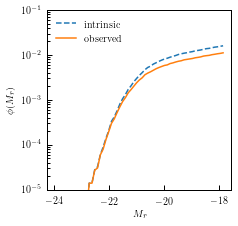

In [37]:
bins = np.linspace(-24,-17.8,62)
bin_centers = (bins[:-1]+bins[1:])/2.0
counts_1 = np.histogram(mag_r, bins=bins)[0]
counts_1 = counts_1/np.prod(halocat.Lbox)/np.diff(bins)
counts_2 = np.histogram(obs_mag_r, bins=bins)[0]
counts_2 = counts_2/np.prod(halocat.Lbox)/np.diff(bins)

plt.figure(figsize=(3.3,3.3))
l1, = plt.plot(bin_centers, counts_1, '--')
l2, = plt.plot(bin_centers, counts_2, '-')
plt.legend([l1,l2],['intrinsic','observed'],
            frameon=False, loc='upper left', fontsize=10)
plt.ylabel('$\phi(M_r)$')
plt.xlabel('$M_r$')
plt.ylim([10**-5,0.1])
plt.yscale('log')